In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import Lasso

In [2]:
my_ratings = pd.read_excel('my-ratings.xlsx')
movies = pd.read_csv('movies.csv')
genres = pd.read_pickle('genres.p')

In [3]:
my_ratings

,userId,movieId,rating,timestamp
0,1000,97938,5.0,2020-02-21 14:34:00
1,1000,122882,5.0,2020-02-21 14:34:00
2,1000,141749,5.0,2020-02-21 14:34:00
3,1000,158783,5.0,2020-02-21 14:34:00
4,1000,166461,5.0,2020-02-21 14:34:00
5,1002,187541,4.0,2020-02-23 18:53:00
6,1002,177765,4.0,2020-02-23 18:56:00
7,1002,179133,5.0,2020-02-23 18:57:00
8,1002,142488,3.5,2020-02-23 19:03:00
9,1002,106920,4.0,2020-02-23 19:05:00


In [4]:
# 유저별 데이터 개수
my_ratings['userId'].value_counts()

1001    95
1002    12
1000     5
Name: userId, dtype: int64

In [5]:
movies.sample()

,movieId,title,genres
5155,8336,"Major and the Minor, The (1942)",Comedy|Romance


In [6]:
genres.sample()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
5425,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [7]:
# 유저 평점 데이터 + 영화 제목 + 영화 아이템 프로필(장르 바이너리)
my_ratings = my_ratings.merge(movies, on='movieId').merge(genres, left_on='movieId', right_index=True)

In [8]:
print(my_ratings.shape)
my_ratings.sample()

(112, 26)


,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
63,1001,177615,5.0,2020-03-12 15:00:00,Lady Bird (2017),Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# 내 데이터 테이블 (1001번)
user1001 = my_ratings[my_ratings['userId']==1001]

In [10]:
user1001.shape

(95, 26)

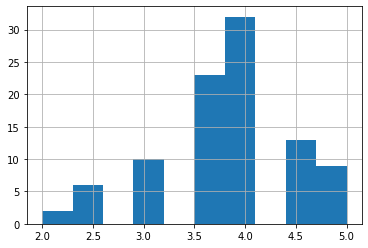

In [11]:
user1001['rating'].hist()
# 평점이 연속형 변수가 아니라서 히스토그램이 이렇게 사이사이 비어있는 것처럼 보임. 실제로는 2.0~5.0 고르게 있음.

In [12]:
user1001['rating'].value_counts()

4.0    32
3.5    23
4.5    13
3.0    10
5.0     9
2.5     6
2.0     2
Name: rating, dtype: int64

In [13]:
user1001['rating'].describe()

count    95.000000
mean      3.800000
std       0.697259
min       2.000000
25%       3.500000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64

In [14]:
# 내가 최고점(5점) 준 영화
user1001[user1001['rating']==5.0]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2,1001,97938,5.0,2020-04-30 12:00:00,Life of Pi (2012),Adventure|Drama|IMAX,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1001,122882,5.0,2020-04-30 12:00:00,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
60,1001,156605,5.0,2020-03-12 15:00:00,Paterson,(no genres listed),1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,1001,164179,5.0,2020-03-12 15:00:00,Arrival (2016),Sci-Fi,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
62,1001,166568,5.0,2020-03-12 15:00:00,Miss Sloane (2016),Thriller,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
63,1001,177615,5.0,2020-03-12 15:00:00,Lady Bird (2017),Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,1001,112556,5.0,2020-04-30 12:00:00,Gone Girl (2014),Drama|Thriller,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
110,1001,134368,5.0,2020-04-30 12:00:00,Spy (2015),Action|Comedy|Crime,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,1001,160080,5.0,2020-04-30 12:00:00,Ghostbusters (2016),Action|Comedy|Horror|Sci-Fi,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [15]:
# 내가 최저점(2점) 준 영화
user1001[user1001['rating']==2.0]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
64,1001,128360,2.0,2020-04-30 12:00:00,The Hateful Eight (2015),Western,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
65,1001,136864,2.0,2020-04-30 12:00:00,Batman v Superman: Dawn of Justice (2016),Action|Adventure|Fantasy|Sci-Fi,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
# 내가 많이 본 장르

In [17]:
genre_cols = genres.columns

In [18]:
user1001[genre_cols].sum().sort_values(ascending=False)

Drama                 40
Comedy                32
Adventure             31
Action                29
Sci-Fi                23
Thriller              18
Fantasy               17
Romance               12
Animation             10
Children               9
Crime                  6
IMAX                   6
Mystery                3
Western                2
Horror                 2
Documentary            1
Musical                1
(no genres listed)     1
War                    0
Film-Noir              0
dtype: int64

# Version 1

In [48]:
# 버전1에서는 장르 바이너리가 0인 것을 nan으로 고쳐야 하고, 버전2에서는 피팅 때문에 그냥 0으로 둬야 한다.
my_ratings_v1 = my_ratings.copy().replace(0, np.nan)
genres_v1 = genres.copy().replace(0, np.nan).merge(movies[['movieId', 'title']], on='movieId') 
# 영화 제목 보려고 붙였는데, 이 때 left_index=True, right_on='movieId' 로 조인하면 안됨. 인덱스 접근이 이상하게 됨. 그냥 on으로 해야 함.

In [49]:
genres_v1.sample()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title
4082,5829,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Men with Brooms (2002)


In [50]:
my_ratings_v1.head()

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1000,97938,5.0,2020-02-21 14:34:00,Life of Pi (2012),Adventure|Drama|IMAX,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,97938,2.5,2020-02-23 19:09:00,Life of Pi (2012),Adventure|Drama|IMAX,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001,97938,5.0,2020-04-30 12:00:00,Life of Pi (2012),Adventure|Drama|IMAX,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000,122882,5.0,2020-02-21 14:34:00,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4,1001,122882,5.0,2020-04-30 12:00:00,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


In [51]:
genres_v1.sample()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title
9591,175485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Death Note (2017)


In [52]:
# 각자의 장르별 평균으로 유저 프로필 만들기 

for col in genre_cols:
    my_ratings_v1[col] = my_ratings_v1[col] * my_ratings_v1['rating']

user_profile_v1 = my_ratings_v1.groupby('userId')[genre_cols].mean()

In [53]:
user_profile_v1.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1000,NaN,5.000000,5.000000,5.0,5.000000,5.000000,NaN,NaN,5.000000,5.000000,NaN,NaN,5.00,NaN,NaN,5.000000,5.000000,5.000000,NaN,NaN
1001,5.0,3.741379,3.887097,4.1,4.222222,3.828125,3.666667,4.0,3.787500,3.617647,NaN,4.50,4.25,4.0,3.833333,3.333333,3.847826,3.777778,NaN,2.5
1002,NaN,3.000000,3.875000,4.5,4.333333,4.250000,5.000000,NaN,3.666667,4.750000,NaN,1.75,2.50,NaN,NaN,3.750000,4.000000,2.750000,NaN,NaN


In [54]:
user_profile_v1.describe()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1.0,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.0,3.000000,3.000000,0.0,2.000000,3.000000,1.0,1.000000,3.000000,3.000000,3.000000,0.0,1.0
mean,5.0,3.913793,4.254032,4.533333,4.518519,4.359375,4.333333,4.0,4.151389,4.455882,NaN,3.125000,3.916667,4.0,3.833333,4.027778,4.282609,3.842593,NaN,2.5
std,NaN,1.011086,0.646055,0.450925,0.420660,0.593544,0.942809,NaN,0.737398,0.736616,NaN,1.944544,1.282900,NaN,NaN,0.867361,0.625921,1.126399,NaN,NaN
min,5.0,3.000000,3.875000,4.100000,4.222222,3.828125,3.666667,4.0,3.666667,3.617647,NaN,1.750000,2.500000,4.0,3.833333,3.333333,3.847826,2.750000,NaN,2.5
25%,5.0,3.370690,3.881048,4.300000,4.277778,4.039062,4.000000,4.0,3.727083,4.183824,NaN,2.437500,3.375000,4.0,3.833333,3.541667,3.923913,3.263889,NaN,2.5
50%,5.0,3.741379,3.887097,4.500000,4.333333,4.250000,4.333333,4.0,3.787500,4.750000,NaN,3.125000,4.250000,4.0,3.833333,3.750000,4.000000,3.777778,NaN,2.5
75%,5.0,4.370690,4.443548,4.750000,4.666667,4.625000,4.666667,4.0,4.393750,4.875000,NaN,3.812500,4.625000,4.0,3.833333,4.375000,4.500000,4.388889,NaN,2.5
max,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.0,5.000000,5.000000,NaN,4.500000,5.000000,4.0,3.833333,5.000000,5.000000,5.000000,NaN,2.5


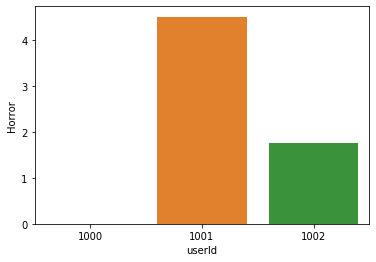

In [55]:
# 세 명의 편차가 가장 큰 호러 장르 평균 비교
# 한 그래프 내에서 모든 장르를 유저별로 비교하는 걸 그리고 싶었는데 어떻게 하는지 잘 모르겠음.. SOS
sns.barplot(x=user_profile_v1.index, y='Horror', data=user_profile_v1)

In [56]:
# 나 호러 잘 안 보는데 왜케 높은 거임ㅋㅋㅋㅋㅋㅋ 뭘 봤는지 보자
user1001[user1001['Horror']==1]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
87,1001,1258,4.0,2020-04-30 12:00:00,"Shining, The (1980)",Horror,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
111,1001,160080,5.0,2020-04-30 12:00:00,Ghostbusters (2016),Action|Comedy|Horror|Sci-Fi,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [57]:
# 호러 장르 포함된 영화 두 개 밖에 없는데 둘 다 높은 점수를 줘서 평균도 높게 나왔다. 
# 근데 고스트버스터즈에 호러가 있다니 놀랍네..
user_profile_v1.loc[1001].sort_values(ascending=False)

(no genres listed)    5.000000
Horror                4.500000
IMAX                  4.250000
Children              4.222222
Animation             4.100000
Musical               4.000000
Documentary           4.000000
Adventure             3.887097
Sci-Fi                3.847826
Mystery               3.833333
Comedy                3.828125
Drama                 3.787500
Thriller              3.777778
Action                3.741379
Crime                 3.666667
Fantasy               3.617647
Romance               3.333333
Western               2.500000
Film-Noir                  NaN
War                        NaN
Name: 1001, dtype: float64

In [58]:
# 노장르로 되어있는 패터슨 하나에 5.0을 줘서 노장르 평균이 제일 높음
user1001[user1001['(no genres listed)']==1]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
60,1001,156605,5.0,2020-03-12 15:00:00,Paterson,(no genres listed),1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# 나의 평점 예측

user = 1001
predict = []
for idx, row in genres_v1.iterrows():
    predict.append((user_profile_v1.loc[user] * row[genre_cols]).mean())

In [60]:
print(len(predict))
print(len(genres_v1))

9742
9742


In [61]:
genres_v1['predict'] = predict

In [64]:
genres_v1.sample()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title,predict
5223,8529,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"Terminal, The (2004)",3.649653


In [65]:
# 이미 평점을 준 영화는 리스트에서 제외한다.
reco_items_v1 = genres_v1[~genres_v1['movieId'].isin(user1001['movieId'])]

In [87]:
# 예상 평점 상위 20개
reco_items_v1 = reco_items_v1.sort_values('predict', ascending=False)
reco_items_v1.head()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title,predict
9562,173535,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Adventures of Sherlock Holmes and Doctor W...,5.0
9217,152037,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grease Live (2016),5.0
9525,171891,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Generation Iron 2,5.0
9518,171749,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Death Note: Desu nôto (2006–2007),5.0
9515,171631,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maria Bamford: Old Baby,5.0


In [67]:
# 내가 노장르 영화 딱 하나에 평점 5.0 준 것 때문에 노장르 영화들만 추천되었음. 이따 v2 끝나고 다시 보며 비교해 보자.

# Version 2

In [68]:
# 버전1에서는 장르 바이너리가 0인 것을 nan으로 고쳐야 하고, 버전2에서는 피팅 때문에 그냥 0으로 둬야 한다.
my_ratings_v2 = my_ratings.copy()
genres_v2 = genres.copy().merge(movies[['movieId', 'title']], on='movieId') 
# 영화 제목 보려고 붙였는데, 이 때 left_index=True, right_on='movieId' 로 조인하면 안됨. 인덱스 접근이 이상하게 됨. 그냥 on으로 해야 함.

In [69]:
my_ratings_v2.sample()

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
37,1001,151317,3.5,2020-03-12 15:00:00,Maggie's Plan (2015),Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# 데이터 수가 적으므로 바로 lasso로 한다.

user_profile_list = []

for userId in my_ratings_v2['userId'].unique():
    user = my_ratings_v2[my_ratings_v2['userId'] == userId]
    X_train = user[genre_cols]
    y_train = user['rating']
    
    reg = Lasso() # 알파값 디폴트
    reg.fit(X_train, y_train)
    
    user_profile_list.append([reg.intercept_, *reg.coef_])

user_profile_v2 = pd.DataFrame(user_profile_list, index = my_ratings_v2['userId'].unique(), columns = ['intercept', *genre_cols])

/Users/jaemin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


In [71]:
user_profile_v2

,intercept,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1000,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,3.458333,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
1001,3.800000,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0


In [73]:
# 우리가 기존에 한 방법으로 평점 예측 (predict 함수 안 쓰고 계수 + 장르 점수)

user = 1001
predict = []
for idx, row in genres_v2.iterrows():
    intercept = user_profile_v2.loc[user, 'intercept']
    genre_score = sum(user_profile_v2.loc[user, genre_cols] * row[genre_cols])
    expected_score = intercept + genre_score
    predict.append(expected_score)

In [74]:
#genres_v2['predict'] = predict

In [76]:
#genres_v2.sort_values('predict', ascending=False).head(20)

In [77]:
print(user1001.shape)
user1001.sample()

(95, 26)


,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
78,1001,112421,3.5,2020-04-30 12:00:00,Frank (2014),Comedy|Drama|Mystery,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [78]:
# 알파값을 임의로 정하지 말고, 내 데이터만 가져다가 하이퍼파라미터 튜닝까지 해서 예측 

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand

In [79]:
param_grid = {'alpha': sp_rand()}

model = Lasso()
rsearch = RandomizedSearchCV(estimator=model, 
                             param_distributions=param_grid, 
                             n_iter=100,
                             cv=10)

rsearch.fit(user1001[genre_cols], user1001['rating'])

/Users/jaemin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1a6c2e80>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [80]:
rsearch.best_estimator_.alpha

0.01417697889961922

In [81]:
predict = rsearch.predict(genres)

In [82]:
genres_v2['predict'] = predict

In [84]:
# 이미 평점을 준 영화는 리스트에서 제외한다.
reco_items_v2 = genres_v2[~genres_v2['movieId'].isin(user1001['movieId'])]

In [88]:
# 예상평점 상위 20개
reco_items_v2 = reco_items_v2.sort_values('predict', ascending=False)
reco_items_v2.head(20)

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title,predict
322,364,0,0,1,1,1,0,0,0,1,...,1,1,0,0,0,0,0,0,"Lion King, The (1994)",4.386825
6347,49274,0,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Happy Feet (2006),4.366792
4105,5882,0,0,1,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,Treasure Planet (2002),4.366792
7761,91386,0,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Happy Feet Two (2011),4.366792
2381,3159,0,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,Fantasia 2000 (1999),4.366792
6313,48414,0,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Open Season (2006),4.366792
8200,103335,0,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Despicable Me 2 (2013),4.366792
7899,95105,0,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Madagascar 3: Europe's Most Wanted (2012),4.366792
7639,87876,0,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Cars 2 (2011),4.366792
6760,59784,0,1,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Kung Fu Panda (2008),4.306345


In [89]:
# v1 결과와 비교

In [90]:
# v1: 노장르만 나옴
reco_items_v1.head(20)

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title,predict
9562,173535,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Adventures of Sherlock Holmes and Doctor W...,5.0
9217,152037,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grease Live (2016),5.0
9525,171891,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Generation Iron 2,5.0
9518,171749,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Death Note: Desu nôto (2006–2007),5.0
9515,171631,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maria Bamford: Old Baby,5.0
8684,122888,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ben-hur (2016),5.0
8836,132084,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Let It Be Me (1995),5.0
8687,122896,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pirates of the Caribbean: Dead Men Tell No Tal...,5.0
9669,182727,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Christmas Story Live! (2017),5.0
8902,134861,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trevor Noah: African American (2013),5.0


In [92]:
# v1: 노장르 걷어내면 그 다음 평균 평점이 높은 호러만 나옴
reco_items_v1[reco_items_v1['(no genres listed)'].isnull()].head(20)

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title,predict
4826,7202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beyond Re-Animator (2003),4.5
2913,3908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Urban Legends: Final Cut (2000),4.5
1037,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vampire in Venice (Nosferatu a Venezia) (Nosfe...,4.5
2162,2878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hell Night (1981),4.5
2791,3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Fury, The (1978)",4.5
1893,2516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Children of the Corn III (1994),4.5
7322,77427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Human Centipede, The (First Sequence) (2009)",4.5
2922,3918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hellbound: Hellraiser II (1988),4.5
9462,168250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Get Out (2017),4.5
2921,3917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hellraiser (1987),4.5


v2에서는 훨씬 다양한 장르의 영화들을 추천한 것을 알 수 있다.  
내가 노장르 영화는 1개, 호러 영화는 2개 밖에 평점을 안 줬는데 그 평점들이 다 높다 보니까 v1에서는 노장르랑 호러만 추천.  
근데 v2는 피팅할 때 이미 장르별 데이터 수 편차(?) 같은 걸 고려해서 계수를 만들어 주니까 좀 더 다양한 추천이 가능.  
이 리스트에서 장르를 한정해서 추천을 받을 수도 있음.  

In [93]:
# 코미디가 포함된 영화 중에 추천을 20개 받아보자
reco_items_v2[reco_items_v2['Comedy']==1].head(20)

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title,predict
6347,49274,0,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Happy Feet (2006),4.366792
7761,91386,0,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Happy Feet Two (2011),4.366792
6313,48414,0,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Open Season (2006),4.366792
8200,103335,0,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Despicable Me 2 (2013),4.366792
7899,95105,0,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Madagascar 3: Europe's Most Wanted (2012),4.366792
7639,87876,0,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Cars 2 (2011),4.366792
6760,59784,0,1,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Kung Fu Panda (2008),4.306345
7550,85261,0,1,1,1,1,1,0,0,0,...,1,0,0,0,1,0,0,0,Mars Needs Moms (2011),4.306345
7455,81564,0,1,0,1,1,1,0,0,0,...,1,0,0,0,1,0,0,0,Megamind (2010),4.306345
6881,62999,0,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,Madagascar: Escape 2 Africa (2008),4.306345
